# N_particles = 5000

### The simulation was run with only one seed for the random generator.

In [1]:
import particles
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")
import scipy

In [2]:
%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = (20, 6)

In [4]:
files = ["./data/test_250_nm.txt", 
         "./data/test_500_nm.txt", 
         "./data/test_750_nm.txt",
         "./data/test_1000_nm.txt",
         "./data/test_1250_nm.txt",
         "./data/test_1500_nm.txt",
         "./data/test_1750_nm.txt",
         "./data/test_2000_nm.txt"]

In [13]:
time = np.arange(0,20100,100)
mom1x = []
mom1y = []
mom2x = []
mom2y = []
v_rat = []
for f in files:
    print(f)
    p = particles.Particles(f, dimension=2, time_start=0, time_end=20000, time_step=100)
    
    n=1
    m1x = np.zeros(p.time.shape[0])
    m1y = np.zeros(p.time.shape[0])
    for i in range(p.qx.shape[1]):
        m1x[i] = np.sum(p.qx[i]**n)/np.sum(p.qx[i]**0)
        m1y[i] = np.sum(p.qy[i]**n)/np.sum(p.qy[i]**0) 
    n=2
    m2x = np.zeros(p.time.shape[0])
    m2y = np.zeros(p.time.shape[0])
    for i in range(p.qx.shape[1]):
        m2x[i] = np.sum(p.qx[i]**n)/np.sum(p.qx[i]**0)
        m2y[i] = np.sum(p.qy[i]**n)/np.sum(p.qy[i]**0)
        
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(time[:30],m1x[:30])
    v = 0.000001 #m/s
    slope/1000 #mm/min
    v_ratio = (slope/1000)/(v*60)
    print("The plume velocity is: {0} [m/s]".format(slope/1000))
    print("The ratio of velocities v_fluid/v_plume = {0}".format(v_ratio))
    v_rat.append(v_ratio)
#     print(r_value)
#     plt.plot(time, m1x, label=f)
    mom1x.append(m1x)
    mom1y.append(m1y)
    mom2x.append(m2x)
    mom2y.append(m2y)

./data/test_250_nm.txt
The plume velocity is: 2.50553390187e-05 [m/s]
The ratio of velocities v_fluid/v_plume = 0.417588983645
./data/test_500_nm.txt
The plume velocity is: 2.50448258874e-05 [m/s]
The ratio of velocities v_fluid/v_plume = 0.41741376479
./data/test_750_nm.txt
The plume velocity is: 2.42540552268e-05 [m/s]
The ratio of velocities v_fluid/v_plume = 0.40423425378
./data/test_1000_nm.txt
The plume velocity is: 2.3991875325e-05 [m/s]
The ratio of velocities v_fluid/v_plume = 0.39986458875
./data/test_1250_nm.txt
The plume velocity is: 2.34933554544e-05 [m/s]
The ratio of velocities v_fluid/v_plume = 0.39155592424
./data/test_1500_nm.txt
The plume velocity is: 2.30704527097e-05 [m/s]
The ratio of velocities v_fluid/v_plume = 0.384507545161
./data/test_1750_nm.txt
The plume velocity is: 2.38712253335e-05 [m/s]
The ratio of velocities v_fluid/v_plume = 0.397853755558
./data/test_2000_nm.txt
The plume velocity is: 2.32869824436e-05 [m/s]
The ratio of velocities v_fluid/v_plume =

In [17]:
d =range(250,2250,250)

### plot particle velocity ratios.

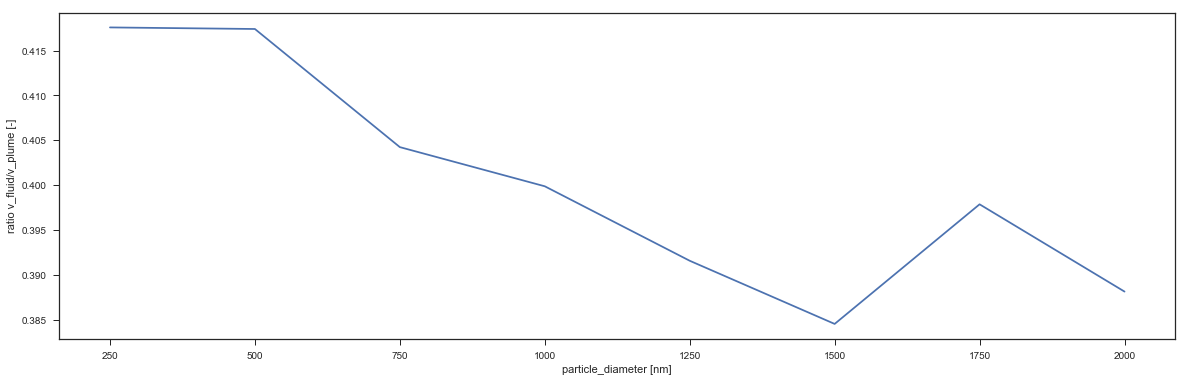

In [26]:
plt.plot(d,v_rat)
plt.ylabel("ratio v_fluid/v_plume [-]")
plt.xlabel("particle_diameter [nm]")

# Moments Order 1

### x-direction

In [6]:
max_ = np.where(time==12500)[0][0]
print(max_)

125


### x-direction

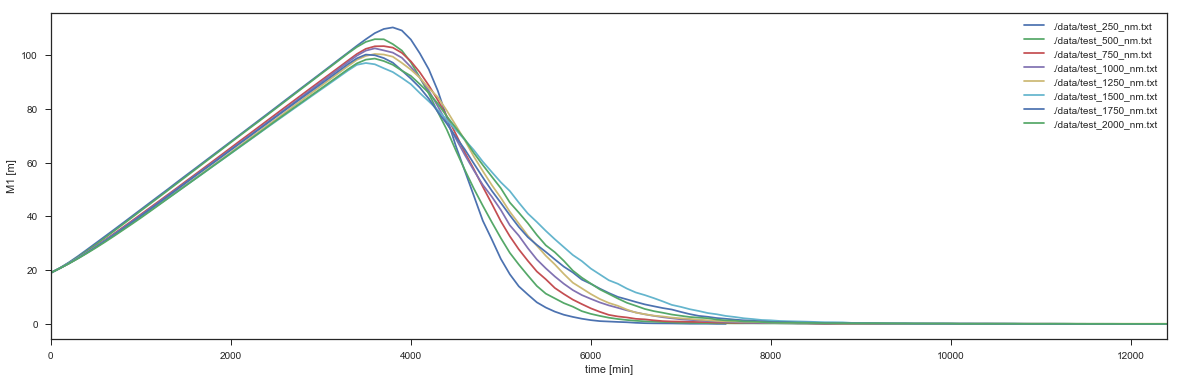

In [7]:
m1x=pd.DataFrame(mom1x[:]).T
m1x.columns = files
m1x.index = time
m1x.iloc[:max_].plot()
plt.ylabel("M1 [m]")
plt.xlabel("time [min]")

### y-direction

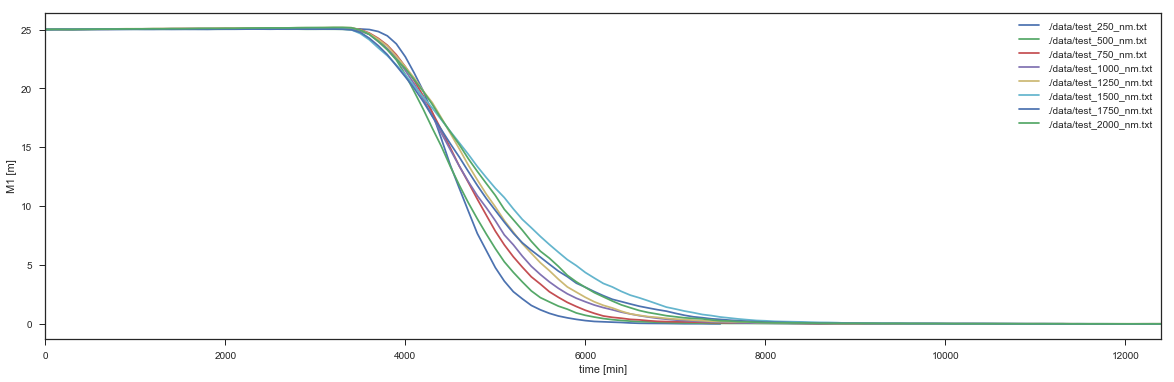

In [8]:
m1y=pd.DataFrame(mom1y[:]).T
m1y.columns = files
m1y.index = time
m1y.iloc[:max_].plot()
plt.ylabel("M1 [m]")
plt.xlabel("time [min]")

# Moments Order 2

### x-direction

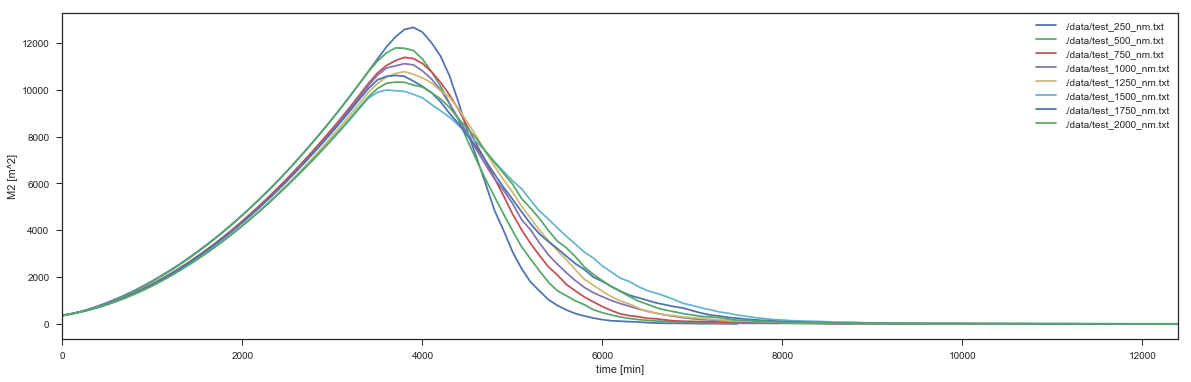

In [9]:
m2x=pd.DataFrame(mom2x[:]).T
m2x.columns = files
m2x.index = time
m2x.iloc[:max_].plot()
plt.ylabel("M2 [m^2]")
plt.xlabel("time [min]")

### y-direction

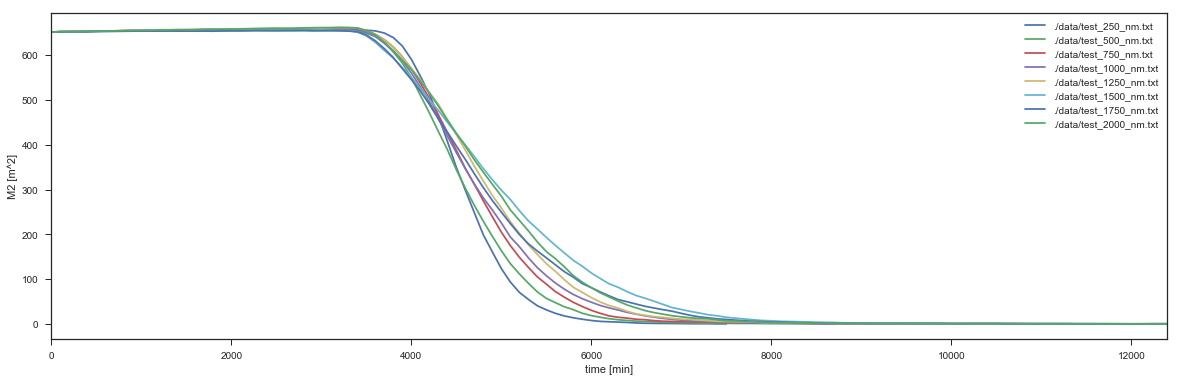

In [10]:
m2y=pd.DataFrame(mom2y[:]).T
m2y.columns = files
m2y.index = time
m2y.iloc[:max_].plot()
plt.ylabel("M2 [m^2]")

plt.xlabel("time [min]")